#### Importing required Libraries

In [2]:
import numpy as np
import pandas as pd # to make dataframes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#### Importing Dataset 

In [9]:
df = pd.read_csv('npk.csv')
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

#### Building Model

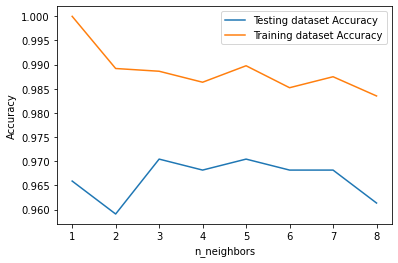

0.9613636363636363

In [4]:
X = df.drop(columns = 'label')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

#### Visualizing Data

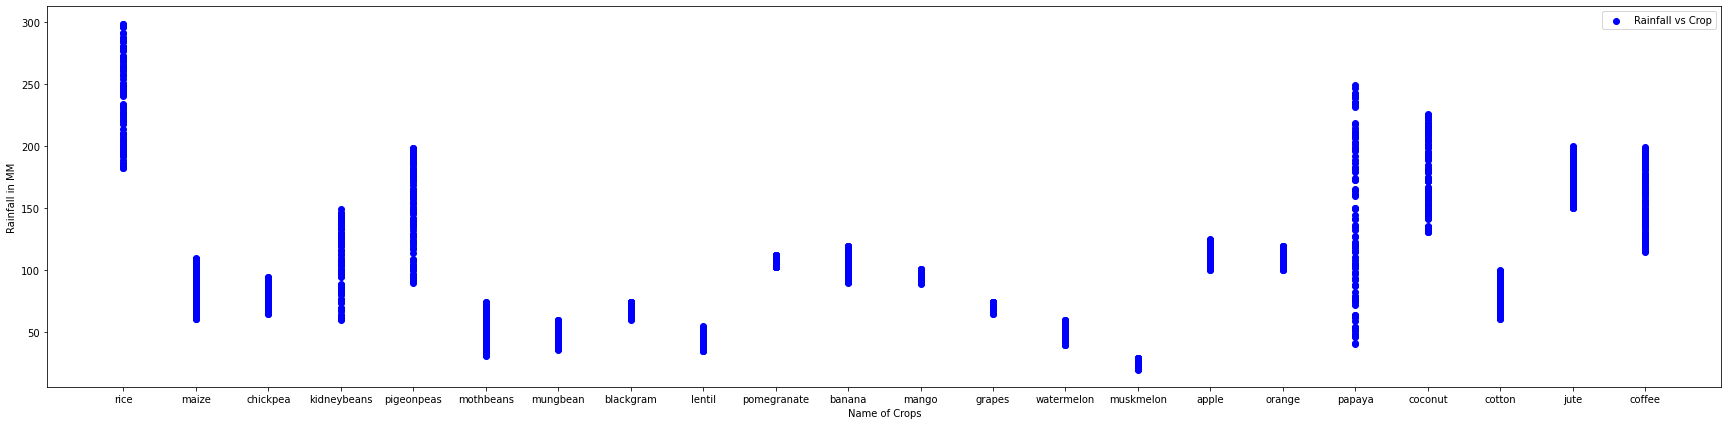

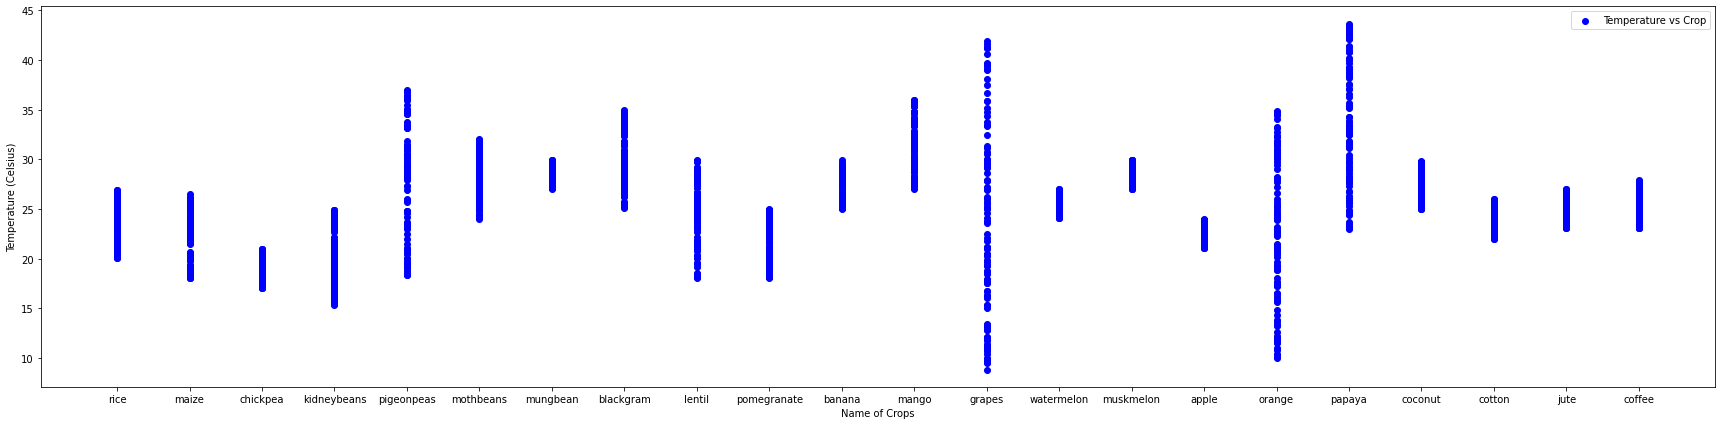

In [6]:
plt.scatter(df['label'], df['rainfall'], label = 'Rainfall vs Crop', color='blue')
plt.rcParams['figure.figsize'] = [30, 7]

plt.legend()
plt.xlabel('Name of Crops')
plt.ylabel('Rainfall in MM')
plt.show()

plt.scatter(df['label'], df['temperature'], label = 'Temperature vs Crop', color='blue')

plt.legend()
plt.xlabel('Name of Crops')
plt.ylabel('Temperature (Celsius)')
plt.show()

#### Testing Model with some Approximate Data

In [8]:
alpha = knn.predict([[90, 40, 40.95,20.9,83,6.7,202]])
alpha[0]

'rice'